In [21]:
from tensorflow import keras
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
from collections import Counter
from konlpy.tag import Okt
from konlpy.tag import Kkma
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic

In [22]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [23]:
train_scaled = train_input/255.0
train_scaled,val_scaled, train_target,val_target = train_test_split(
     train_scaled,train_target,test_size=0.2, random_state=42
)

In [24]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) #sigmoid
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#  epochs 돌 때마다 loss,accuracy 값을 저장 
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_15872\2867420625.py", line 3, in <module>
    history = model.fit(train_scaled,train_target,epochs=20,
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'validate_data'

During handling of the above exception, another exception occurred:

Traceback (most recent call l

In [26]:
model = keras.models.load_model('best_model.keras')
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.8880 - loss: 0.4146


[0.41733288764953613, 0.890500009059906]

In [27]:
# 11번째가 좋다면 20번째까지 실행을 시킬 필요가 없음
# 조기종료
# ModelCheckpoint : 가장 손실률이 낮은 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# compile 호출
# model.compile(optimizer='adams',loss='sparse_categorical_crossentry',metrics=['accuarcy'])
# 조기종료
# patience = 2, 손실값이 2번이상나면 종료
# restore_best_weights=True : 뒤로 back을 해서 가장 좋은 모델의 위치로 이동
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9311 - loss: 0.1792 - val_accuracy: 0.8913 - val_loss: 0.4064
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9310 - loss: 0.1754 - val_accuracy: 0.8893 - val_loss: 0.4398
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9317 - loss: 0.1780 - val_accuracy: 0.8925 - val_loss: 0.4065


In [28]:
early_stopping_cb.stopped_epoch

2

Text(0, 0.5, 'loss')

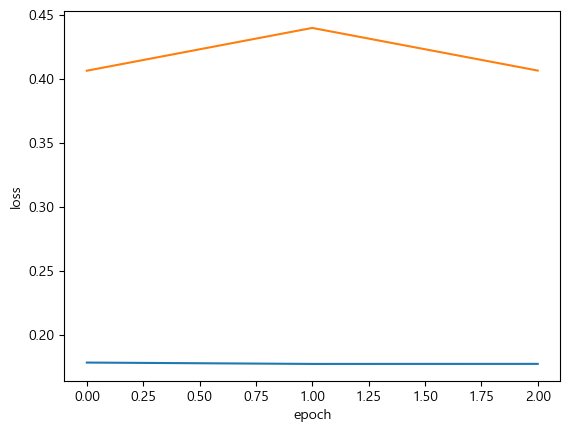

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [30]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.8900 - loss: 0.3990


[0.40642762184143066, 0.8913333415985107]